In [1]:
# Reload when code changed:
%load_ext autoreload
%autoreload 2
%pwd
import os 
import sys
path = "../"
sys.path.append(path)
#os.path.abspath("../")
print(os.path.abspath(path))

D:\github\ekostat_calculator


In [2]:
import pandas as pd
import numpy as np
import json
import timeit
import time
import core
import importlib
importlib.reload(core)
import logging
importlib.reload(core) 
try:
    logging.shutdown()
    importlib.reload(logging)
except:
    pass
from event_handler import EventHandler
print(core.__file__)
pd.__version__

..\core\__init__.py


'0.19.2'

### Load directories

In [3]:
root_directory = 'D:/github/ekostat_calculator'#"../" #os.getcwd()
workspace_directory = root_directory + '/workspaces' 
resource_directory = root_directory + '/resources'
#alias = 'lena'
user_id = 'test_user' #kanske ska vara off_line user?
workspace_alias = 'lena_indicator'

## Initiate EventHandler

In [4]:
print(root_directory)
paths = {'user_id': user_id, 
         'workspace_directory': root_directory + '/workspaces', 
         'resource_directory': root_directory + '/resources', 
         'log_directory': 'D:/github' + '/log', 
         'test_data_directory': 'D:/github' + '/test_data'}

D:/github/ekostat_calculator


In [5]:
t0 = time.time()
ekos = EventHandler(**paths)
#request = ekos.test_requests['request_workspace_list']
#response = ekos.request_workspace_list(request) 
#ekos.write_test_response('request_workspace_list', response)
print('-'*50)
print('Time for request: {}'.format(time.time()-t0))
# OLD: ekos = EventHandler(root_directory)

2018-06-07 16:50:32,841	logger.py	85	add_log	DEBUG	
2018-06-07 16:50:32,844	logger.py	86	add_log	DEBUG	========================================================================================================================
2018-06-07 16:50:32,847	logger.py	87	add_log	DEBUG	### Log added for log_id "event_handler" at locaton: D:\github\log\main_event_handler.log
2018-06-07 16:50:32,850	logger.py	88	add_log	DEBUG	------------------------------------------------------------------------------------------------------------------------
2018-06-07 16:50:32,857	event_handler.py	74	__init__	DEBUG	Start EventHandler: event_handler


event_handler
D:/github/log
main
----------------------------------------------------------------------------------------------------
--------------------------------------------------
Time for request: 4.524452209472656


### Load existing workspace

In [6]:
#ekos.copy_workspace(source_uuid='default_workspace', target_alias='lena_1')

In [7]:
ekos.print_workspaces()

Current workspaces for user are:

uuid                                    alias                         status                        
----------------------------------------------------------------------------------------------------
default_workspace                       default_workspace             readable                      
ddc27979-76f8-471c-a0b4-3bc773c6ecbf    lena                          editable                      
9eea0d00-c024-410f-912a-980eed55acae    lena_newdata                  editable                      
147f5d47-773c-43f0-b337-57208718d0cf    lena_indicator                editable                      
6fe05a39-2018-4cba-9dd4-27057578ff23    lena_1                        editable                      


In [8]:
workspace_uuid = ekos.get_unique_id_for_alias(workspace_alias = 'lena_indicator')
print(workspace_uuid)

147f5d47-773c-43f0-b337-57208718d0cf


In [9]:
workspace_alias = ekos.get_alias_for_unique_id(workspace_unique_id = workspace_uuid)

In [10]:
ekos.load_workspace(unique_id = workspace_uuid)
# Här får jag ofta felmeddelande:
# AttributeError: module 'core' has no attribute 'ParameterMapping'

2018-06-07 16:50:44,177	event_handler.py	1674	load_workspace	DEBUG	Trying to load new workspace "147f5d47-773c-43f0-b337-57208718d0cf" with alias "lena_indicator"
2018-06-07 16:50:44,275	logger.py	85	add_log	DEBUG	
2018-06-07 16:50:44,277	logger.py	86	add_log	DEBUG	========================================================================================================================
2018-06-07 16:50:44,279	logger.py	87	add_log	DEBUG	### Log added for log_id "30062c90-2a60-4ee1-9944-f00329db1174" at locaton: D:\github\ekostat_calculator\workspaces\147f5d47-773c-43f0-b337-57208718d0cf\log\subset_30062c90-2a60-4ee1-9944-f00329db1174.log
2018-06-07 16:50:44,281	logger.py	88	add_log	DEBUG	------------------------------------------------------------------------------------------------------------------------
2018-06-07 16:50:44,333	logger.py	85	add_log	DEBUG	
2018-06-07 16:50:44,336	logger.py	86	add_log	DEBUG	==================================================================================


Initiating WorkSpace: D:/github/ekostat_calculator/workspaces/147f5d47-773c-43f0-b337-57208718d0cf
Parent directory is: D:/github/ekostat_calculator/workspaces
Resource directory is: D:/github/ekostat_calculator/resources
=== 30062c90-2a60-4ee1-9944-f00329db1174
!!! A
!!! 30062c90-2a60-4ee1-9944-f00329db1174
!!! D:/github/ekostat_calculator/workspaces/147f5d47-773c-43f0-b337-57208718d0cf/subsets
----------------------------------------------------------------------------------------------------
Initiating Subset: D:/github/ekostat_calculator/workspaces/147f5d47-773c-43f0-b337-57208718d0cf/subsets/30062c90-2a60-4ee1-9944-f00329db1174
===
D:/github/ekostat_calculator/workspaces/147f5d47-773c-43f0-b337-57208718d0cf/subsets/30062c90-2a60-4ee1-9944-f00329db1174
load_water_body_station_filter
Initiating WorkStep: D:/github/ekostat_calculator/workspaces/147f5d47-773c-43f0-b337-57208718d0cf/subsets/30062c90-2a60-4ee1-9944-f00329db1174/step_1
load_water_body_station_filter
Initiating WorkStep:

2018-06-07 16:50:44,566	logger.py	85	add_log	DEBUG	
2018-06-07 16:50:44,567	logger.py	86	add_log	DEBUG	========================================================================================================================
2018-06-07 16:50:44,569	logger.py	87	add_log	DEBUG	### Log added for log_id "147f5d47-773c-43f0-b337-57208718d0cf" at locaton: D:\github\ekostat_calculator\workspaces\147f5d47-773c-43f0-b337-57208718d0cf\log\workspace_147f5d47-773c-43f0-b337-57208718d0cf.log
2018-06-07 16:50:44,572	logger.py	88	add_log	DEBUG	------------------------------------------------------------------------------------------------------------------------
2018-06-07 16:50:44,574	event_handler.py	1692	load_workspace	INFO	Workspace "147f5d47-773c-43f0-b337-57208718d0cf" with alias "lena_indicator loaded."


147f5d47-773c-43f0-b337-57208718d0cf
D:/github/ekostat_calculator/workspaces/147f5d47-773c-43f0-b337-57208718d0cf/log
workspace
----------------------------------------------------------------------------------------------------


True

In [11]:
ekos.import_default_data(workspace_alias = workspace_alias)

2018-06-07 16:50:46,122	event_handler.py	1042	import_default_data	DEBUG	Trying to load default data in workspace "147f5d47-773c-43f0-b337-57208718d0cf" with alias "lena_indicator"
2018-06-07 16:50:46,150	workspaces.py	1006	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: chlorophyll_integrated_2015_2016_row_format.txt
2018-06-07 16:50:46,179	workspaces.py	1006	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: chlorophyll_sharkweb_data_chlorophyll_wb_2007-2017_20180320.txt
2018-06-07 16:50:46,194	workspaces.py	1006	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: physicalchemicalmodel_110001_PROFILER_alldepths_SE652400-223501_toolbox.dat
2018-06-07 16:50:46,215	workspaces.py	1006	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: physicalchemicalmodel_120004_PROFILER_alldepths_SE612520-172080_toolbox.dat


File already added
File already added
File already added
File already added


2018-06-07 16:50:46,484	workspaces.py	1006	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: physicalchemical_sharkweb_data_fyskem_wb_2007-2017_20180320.txt
2018-06-07 16:50:46,641	workspaces.py	1006	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: phytoplankton_2016_row_format.txt


File already added
File already added


2018-06-07 16:50:46,915	workspaces.py	1006	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: phytoplankton_sharkweb_data_biovolume_wb_2007-2012_20180320.txt


File already added


2018-06-07 16:50:47,133	workspaces.py	1006	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: phytoplankton_sharkweb_data_biovolume_wb_2013-2017_20180320.txt
2018-06-07 16:50:47,245	workspaces.py	1006	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: zoobenthos_2016_row_format_2.txt
2018-06-07 16:50:47,290	workspaces.py	1006	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: zoobenthos_sharkweb_data_BQIm_wb_2007-2017_20180320.txt


File already added
File already added
File already added


### Load all data in workspace

In [12]:
#ekos.get_workspace(unique_id = workspace_uuid, alias = workspace_alias).delete_alldata_export()

In [13]:
#%%timeit
ekos.load_data(unique_id = workspace_uuid)

self.all_data 0


2018-06-07 16:50:52,542	workspaces.py	1609	load_all_data	DEBUG	Data has been loaded from existing all_data.pickle file.


In [14]:
w = ekos.get_workspace(unique_id = workspace_uuid)
len(w.data_handler.get_all_column_data_df())

2018-06-07 16:50:52,885	event_handler.py	999	get_workspace	DEBUG	Getting workspace "147f5d47-773c-43f0-b337-57208718d0cf" with alias "lena_indicator"


106094

# Step 0 

### Apply first data filter 

In [15]:
w.apply_data_filter(step = 0) # This sets the first level of data filter in the IndexHandler 

# Step 1 Set subset filter

In [16]:
#w.copy_subset(source_uuid='default_subset', target_alias='A')

In [17]:
subset_uuid = ekos.get_unique_id_for_alias(workspace_alias = workspace_alias, subset_alias = 'A')
print(w.get_subset_list(), subset_uuid)

f1 = w.get_data_filter_object(subset = subset_uuid, step=1) 
print(f1.include_list_filter)

w.apply_data_filter(subset = subset_uuid, step = 1)

df_step1 = w.get_filtered_data(step = 1, subset = subset_uuid)
#df_step1[['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'MNDEP', 'MXDEP','BQIm']].dropna(subset = ['BQIm'])

['30062c90-2a60-4ee1-9944-f00329db1174', 'default_subset'] 30062c90-2a60-4ee1-9944-f00329db1174
{'MYEAR': ['2013', '2014', '2015', '2016', '2017', '2018', '2019'], 'STATN': [], 'WATER_BODY': []}


2018-06-07 16:50:59,159	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_1


In [18]:
print(df_step1.columns)

Index(['AMON', 'BIOV_CONC_ALL', 'BQIm', 'CPHL_BTL', 'CPHL_INTEG', 'DEPH',
       'DIN', 'DOXY_BTL', 'DOXY_CTD', 'LATIT_DD', 'LONGI_DD', 'MNDEP', 'MXDEP',
       'MYEAR', 'NTOT', 'NTRA', 'NTRI', 'NTRZ', 'PHOS', 'PTOT', 'Q_AMON',
       'Q_BIOV_CONC_ALL', 'Q_BQIm', 'Q_CPHL_BTL', 'Q_CPHL_INTEG', 'Q_DOXY_BTL',
       'Q_DOXY_CTD', 'Q_NTOT', 'Q_NTRA', 'Q_NTRI', 'Q_NTRZ', 'Q_PHOS',
       'Q_PTOT', 'Q_SALT_BTL', 'Q_SALT_CTD', 'Q_SECCHI', 'Q_TEMP_BTL',
       'Q_TEMP_CTD', 'SALT_BTL', 'SALT_CTD', 'SDATE', 'SEA_BASIN', 'SECCHI',
       'SERNO', 'SHARKID_MD5', 'SHIPC', 'STATN', 'STIME', 'TEMP_BTL',
       'TEMP_CTD', 'VISS_EU_CD', 'WATER_BODY_NAME', 'WATER_DISTRICT',
       'WATER_TYPE_AREA', 'WLTYP', 'origin_dtype', 'origin_file_path', 'MONTH',
       'YEAR', 'POSITION', 'visit_id_str', 'SALT', 'Q_SALT', 'source_SALT',
       'TEMP', 'Q_TEMP', 'source_TEMP', 'DOXY', 'Q_DOXY', 'source_DOXY',
       'CPHL_INTEG_CALC', 'CPHL_INTEG_CALC_depths', 'CPHL_INTEG_CALC_values',
       'index_column'],
  

# Step 2

In [19]:
water_body = 'SE574000-114230' # type_area 1-s,
w.get_step_object(step = 2, subset = subset_uuid).load_indicator_settings_filters()

temp = w.get_step_object(step = 2, subset = subset_uuid).indicator_data_filter_settings['oxygen']
temp.get_value(variable='REF_VALUE', type_area='1', water_body = water_body)
#temp.settings.df

'3.5'

In [20]:
w.get_step_object(step = 2, subset = subset_uuid).get_indicator_data_filter_settings('oxygen')

In [21]:
w.get_step_object(step = 2, subset = subset_uuid).indicator_ref_settings

{'biov': <core.filters.SettingsRef at 0x950f160>,
 'bqi': <core.filters.SettingsRef at 0x950f0f0>,
 'chl': <core.filters.SettingsRef at 0x950f240>,
 'din_winter': <core.filters.SettingsRef at 0x950f2b0>,
 'dip_winter': <core.filters.SettingsRef at 0x950f2e8>,
 'ntot_summer': <core.filters.SettingsRef at 0x950f320>,
 'ntot_winter': <core.filters.SettingsRef at 0x950f358>,
 'oxygen': <core.filters.SettingsRef at 0x950f3c8>,
 'ptot_summer': <core.filters.SettingsRef at 0x950f438>,
 'ptot_winter': <core.filters.SettingsRef at 0x950f400>,
 'secchi': <core.filters.SettingsRef at 0x950f4a8>}

In [22]:
w.get_step_object(step = 2, subset = subset_uuid)._indicator_setting_files['oxygen']

In [24]:
indicator_list = w.get_available_indicators(subset= subset_uuid, step=2)

2018-06-07 16:52:39,397	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2
2018-06-07 16:52:39,450	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2


subset 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174


2018-06-07 16:52:39,930	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2
2018-06-07 16:52:39,988	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2
2018-06-07 16:52:40,042	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2
2018-06-07 16:52:40,102	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2


subset 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174


2018-06-07 16:52:40,149	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2
2018-06-07 16:52:40,207	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2
2018-06-07 16:52:40,251	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2
2018-06-07 16:52:40,294	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2


subset 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174
"['TOT_COVER_ALL'] not in index"
subset 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174
subset

2018-06-07 16:52:40,351	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2
2018-06-07 16:52:40,398	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2


 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174


#### Apply indicator filter

In [25]:
wb_list = df_step1.VISS_EU_CD.unique()
print('number of waterbodies in step 1: {}'.format(len(wb_list)))
typeA_list = [row.split('-')[0].strip().lstrip('0') for row in df_step1.WATER_TYPE_AREA.unique()]
print('number of type areas in step 1: {}'.format(len(typeA_list)))

number of waterbodies in step 1: 310
number of type areas in step 1: 27


In [52]:
wb_list.tolist()[96]#.index(test_wb[-1])

'SE570500-163750'

In [53]:
#list(zip(typeA_list, df_step1.WATER_TYPE_AREA.unique()))
indicator_list = ['oxygen','bqi','din_winter','ntot_summer', 'ntot_winter', 'dip_winter', 'ptot_summer', 'ptot_winter', 'biov', 'chl', 'secchi']
test_wb = ['SE575370-164220', 'SE573940-163560', 'SE565400-163600', 'SE570080-163430', 'SE565800-163000', 'SE570340-163710', 'SE570500-163750']
for indicator in indicator_list:
    w.apply_indicator_data_filter(step = 2, 
                          subset = subset_uuid, 
                          indicator = indicator,
                          water_body_list = test_wb)

Water body SE575370-164220
Water body SE573940-163560
Water body SE565400-163600
Water body SE570080-163430
Water body SE565800-163000
Water body SE570340-163710
Water body SE570500-163750
Water body SE575370-164220
RESULT [5, 6]
Water body SE573940-163560
RESULT [5, 6]
Water body SE565400-163600
RESULT [5, 6]
Water body SE570080-163430
RESULT [5, 6]
Water body SE565800-163000
RESULT [5, 6]
Water body SE570340-163710
RESULT [5, 6]
Water body SE570500-163750
RESULT [5, 6]
Water body SE575370-164220
RESULT [12, 1, 2]
Water body SE573940-163560
RESULT [12, 1, 2]
Water body SE565400-163600
RESULT [12, 1, 2]
Water body SE570080-163430
RESULT [12, 1, 2]
Water body SE565800-163000
RESULT [12, 1, 2]
Water body SE570340-163710
RESULT [12, 1, 2]
Water body SE570500-163750
RESULT [12, 1, 2]
Water body SE575370-164220
RESULT [6, 7, 8]
Water body SE573940-163560
RESULT [6, 7, 8]
Water body SE565400-163600
RESULT [6, 7, 8]
Water body SE570080-163430
RESULT [6, 7, 8]
Water body SE565800-163000
RESULT

In [54]:
print(test_wb[1])
w.get_filtered_data(subset = subset_uuid, step= 2, water_body = test_wb[1], indicator = 'din_winter').VISS_EU_CD

2018-06-07 17:12:33,150	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2


SE573940-163560


6951     SE573940-163560
9996     SE573940-163560
10964    SE573940-163560
18146    SE573940-163560
18641    SE573940-163560
26459    SE573940-163560
26705    SE573940-163560
34157    SE573940-163560
Name: VISS_EU_CD, dtype: object

In [55]:
w.index_handler.booleans['step_0'][subset_uuid]['step_1']['step_2'][test_wb[0]].keys()#['SE584340-174401'].keys()

dict_keys(['boolean', 'oxygen', 'bqi', 'din_winter', 'ntot_summer', 'ntot_winter', 'dip_winter', 'ptot_summer', 'ptot_winter', 'biov', 'chl', 'secchi'])

In [56]:
wb = test_wb[0]#'SE583926-161744' #typomr 22
#wb = 'SE654470-222700' #typomr 13
type_area = '2'#'01s - Västkustens inre kustvatten'
indicator = 'din_winter'
#w.index_handler.booleans['step_0'][subset_uuid]['step_1']['step_2'][type_area]['din_winter']['boolean']

In [57]:
print(w.get_filtered_data(step = 2, subset = subset_uuid, water_body = wb, indicator = indicator).MONTH.unique())
print(w.get_filtered_data(step = 2, subset = subset_uuid, water_body = wb, indicator = indicator).DEPH.min(),
        w.get_filtered_data(step = 2, subset = subset_uuid, water_body = wb, indicator = indicator).DEPH.max())
print(w.get_filtered_data(step = 2, subset = subset_uuid, water_body = wb, indicator = indicator).VISS_EU_CD.unique())
w.get_filtered_data(step = 2, subset = subset_uuid, water_body = wb).WATER_TYPE_AREA.unique()

2018-06-07 17:12:35,928	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2
2018-06-07 17:12:35,939	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2
2018-06-07 17:12:35,948	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2
2018-06-07 17:12:35,952	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2
2018-06-07 17:12:35,958	workspaces.py	1412	get_filtered_data	DEBUG	STEP: step_2


[12  1]
0.5 8.3
['SE575370-164220']


array(['12s - Östergötlands och Stockholms skärgård. Mellankustvatten'], dtype=object)

In [58]:
w.mapping_objects['quality_element'].cfg['indicators']
[item.strip() for item in w.mapping_objects['quality_element'].cfg['indicators'].loc[indicator][0].split(', ')]

['DIN', 'SALT']

# Step 3 Load Indicator objects step 3....

In [59]:
w.get_step_object(step = 3, subset = subset_uuid).indicator_setup(subset_unique_id = subset_uuid) 
#, indicator_list = ['din_winter', 'dip_winter']

********
din_winter
********
ntot_summer
********
ntot_winter
********
dip_winter
********
ptot_summer
********
ptot_winter
********
bqi
********
oxygen
********
biov
********
chl
********
secchi


In [60]:
w.get_step_object(step = 3, subset = subset_uuid).indicator_objects[indicator].get_ref_value_type(water_body = wb)

'str'

In [61]:
ind_obj = w.get_step_object(step = 3, subset = subset_uuid).indicator_objects[indicator]

In [62]:
ind_obj.column_list

['SDATE',
 'YEAR',
 'MONTH',
 'POSITION',
 'VISS_EU_CD',
 'WATER_TYPE_AREA',
 'DEPH',
 'DIN',
 'SALT']

In [63]:
temp_dict = {'VISS_EU_CD': ['SE574000-114231'], 'WATER_TYPE_AREA': ['123'], 'SDATE': ['1999-01-01'], 'YEAR': [1999],
                                'PERIOD': ['x'], 'STATUS': ['bra'],'local_EQR': [0.6], 'number_of_values': [4], 'YEARS INCLUDED': ['x']}
temp = pd.DataFrame.from_dict(temp_dict)  
temp.head()
#temp.set_index('VISS_EU_CD', inplace = True)
temp.head()

,PERIOD,SDATE,STATUS,VISS_EU_CD,WATER_TYPE_AREA,YEAR,YEARS INCLUDED,local_EQR,number_of_values
0,x,1999-01-01,bra,SE574000-114231,123,1999,x,0.6,4


In [64]:
ind_obj.water_body_indicator_df[test_wb[5]]#.keys()

#df

KeyError: 'SE570340-163710'

In [65]:
ind_obj.get_filtered_data(subset = subset_uuid, step = 'step_2', water_body = test_wb[-1], indicator = 'din_winter')[['VISS_EU_CD']]

,VISS_EU_CD
6965,SE570500-163750
10426,SE570500-163750
10942,SE570500-163750
18226,SE570500-163750
18647,SE570500-163750
26417,SE570500-163750
26688,SE570500-163750


In [68]:
df = ind_obj.water_body_indicator_df['SE570500-163750']
type_area = ind_obj.mapping_objects['water_body'].get_type_area_for_water_body('SE570500-163750', include_suffix=True)
by_date = df.groupby(['SDATE', 'YEAR'],).local_EQR.agg(['count', 'min', 'max', 'mean']).reset_index()
by_date.rename(columns={'mean':'local_EQR', 'count': 'number_of_values'}, inplace=True) # Cant use "mean" below
by_date['WATER_TYPE_AREA'] = type_area
by_date['VISS_EU_CD'] = water_body
#by_date.set_index('VISS_EU_CD', inplace = True)
#temp.merge(by_date, how = 'outer')
df

,SDATE,YEAR,MONTH,POSITION,VISS_EU_CD,WATER_TYPE_AREA,DEPH,DIN,SALT,REFERENCE_VALUE,local_EQR,global_EQR,STATUS
6965,2016-12-15,2016,12,57.10_16.56,SE570500-163750,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,9.97,5.70,8.91040,0.893721,0.893721,HIGH
10426,2016-01-13,2016,1,57.10_16.56,SE570500-163750,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,5.30,7.50,0.04000,0.007547,0.005205,BAD
10942,2015-12-08,2015,12,57.10_16.56,SE570500-163750,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,5.29,6.60,4.47520,0.845974,0.845974,HIGH
18226,2015-01-21,2015,1,57.10_16.56,SE570500-163750,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,21.74,3.38,20.34336,0.935757,0.935757,HIGH
26688,2013-12-17,2013,12,57.10_16.56,SE570500-163750,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,4.66,6.70,3.98240,0.854592,0.854592,HIGH


In [69]:
temp = pd.concat([temp,by_date])

In [70]:
temp

,PERIOD,SDATE,STATUS,VISS_EU_CD,WATER_TYPE_AREA,YEAR,YEARS INCLUDED,local_EQR,max,min,number_of_values
0,x,1999-01-01,bra,SE574000-114231,123,1999,x,0.600000,NaN,NaN,4
0,NaN,2013-12-17,NaN,SE574000-114230,8,2013,NaN,0.854592,0.854592,0.854592,1
1,NaN,2015-01-21,NaN,SE574000-114230,8,2015,NaN,0.935757,0.935757,0.935757,1
2,NaN,2015-12-08,NaN,SE574000-114230,8,2015,NaN,0.845974,0.845974,0.845974,1
3,NaN,2016-01-13,NaN,SE574000-114230,8,2016,NaN,0.007547,0.007547,0.007547,1
4,NaN,2016-12-15,NaN,SE574000-114230,8,2016,NaN,0.893721,0.893721,0.893721,1


In [100]:
test_wb = ['SE575370-164220', 'SE573940-163560', 'SE565400-163600', 'SE570080-163430', 'SE565800-163000', 'SE570340-163710', 'SE570500-163750']
for WB in test_wb:
    ind_obj.calculate_status(water_body = WB)

SE575370-164220
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
DIN                float64
SALT               float64
dtype: object
SE575370-164220 1
str
ref_value is str
6.5
6.5 -1.0833*s+9
resulting ref value: 1.9585500000000007
6.5999999999999996
6.6

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


 -1.0833*s+9
resulting ref value: 1.850220000000001
7.0999999999999996
7.1 -1.0833*s+9
resulting ref value: 1.3085700000000005
7.2000000000000002
7.2 -1.0833*s+9
resulting ref value: 1.20024
6.9000000000000004
6.9 -1.0833*s+9
resulting ref value: 1.5252300000000005
7.0
7.0 -1.0833*s+9
resulting ref value: 1.4169
6.7000000000000002
6.7 -1.0833*s+9
resulting ref value: 1.7418900000000006
6.7999999999999998
6.8 -1.0833*s+9
resulting ref value: 1.633560000000001
6.2000000000000002
6.2 -1.0833*s+9
resulting ref value: 2.2835400000000003
6.7000000000000002
6.7 -1.0833*s+9
resulting ref value: 1.7418900000000006
			din_winter local_EQR Calculated
                count      mean       std     min       25%       50%  \
mean_local_EQR    3.0  0.391807  0.135516  0.2437  0.332912  0.422125   

                    75%       max all_ok  
mean_local_EQR  0.46586  0.509596  False  
SE573940-163560
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            ob

In [73]:
ind_obj.classification_results['status_by_period']#['SE570500-163750']#.keys()

,VISS_EU_CD,WATER_TYPE_AREA,PERIOD,STATUS,global_EQR,Number of YEARS,YEARS INCLUDED


In [74]:
WB

'SE570500-163750'

In [101]:
print(ind_obj.classification_results[wb].keys())
concat_df = False
for key, value in ind_obj.classification_results.items():
    if key == 'all_data':
        pass
    if key.startswith('SE'):
        if type(concat_df) is pd.DataFrame:
            concat_df = pd.concat([concat_df, value])
        else:
            concat_df = value    
    else:
        print('**************************************')
        print(key)
        print(value)


Index(['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA',
       'DEPH', 'DIN', 'SALT', 'REFERENCE_VALUE', 'local_EQR', 'global_EQR',
       'STATUS'],
      dtype='object')
**************************************
parameter
None
**************************************
salt_parameter
None
**************************************
indicator
None
**************************************
all_data
None
**************************************
all_ok
False
**************************************
status_by_date
   REF VALUE       SDATE STATUS       VISS_EU_CD WATER_TYPE_AREA    YEAR  \
0        NaN  2013-01-21    NaN  SE575370-164220            12-s  2013.0   
1        NaN  2013-12-19    NaN  SE575370-164220            12-s  2013.0   
2        NaN  2015-12-07    NaN  SE575370-164220            12-s  2015.0   
3        NaN  2016-01-12    NaN  SE575370-164220            12-s  2016.0   
4        NaN  2016-12-21    NaN  SE575370-164220            12-s  2016.0   
0        NaN  2013-01-23

In [95]:
concat_df

,SDATE,YEAR,MONTH,POSITION,VISS_EU_CD,WATER_TYPE_AREA,DEPH,DIN,SALT,REFERENCE_VALUE,local_EQR,global_EQR,STATUS
6949,2016-12-21,2016,12,57.90_16.70,SE575370-164220,12s - Östergötlands och Stockholms skärgård. M...,0.5,4.68,6.50,1.958550,0.418494,0.371325,POOR
6950,2016-12-21,2016,12,57.90_16.70,SE575370-164220,12s - Östergötlands och Stockholms skärgård. M...,7.3,6.22,6.60,1.850220,0.297463,0.209951,POOR
10551,2016-01-12,2016,1,57.90_16.70,SE575370-164220,12s - Östergötlands och Stockholms skärgård. M...,0.5,1.79,7.10,1.308570,0.731045,0.701492,GOOD
10552,2016-01-12,2016,1,57.90_16.70,SE575370-164220,12s - Östergötlands och Stockholms skärgård. M...,7.7,4.97,7.20,1.200240,0.241497,0.166550,BAD
10962,2015-12-07,2015,12,57.90_16.70,SE575370-164220,12s - Östergötlands och Stockholms skärgård. M...,0.5,6.21,6.90,1.525230,0.245609,0.169385,BAD
10963,2015-12-07,2015,12,57.90_16.70,SE575370-164220,12s - Östergötlands och Stockholms skärgård. M...,8.0,5.86,7.00,1.416900,0.241792,0.166753,BAD
26664,2013-12-19,2013,12,57.90_16.70,SE575370-164220,12s - Östergötlands och Stockholms skärgård. M...,0.5,1.65,6.70,1.741890,1.000000,1.000000,HIGH
26665,2013-12-19,2013,12,57.90_16.70,SE575370-164220,12s - Östergötlands och Stockholms skärgård. M...,8.3,2.55,6.80,1.633560,0.640612,0.582374,MODERATE
34170,2013-01-21,2013,1,57.90_16.70,SE575370-164220,12s - Östergötlands och Stockholms skärgård. M...,0.5,10.65,6.20,2.283540,0.214417,0.147874,BAD
34171,2013-01-21,2013,1,57.90_16.70,SE575370-164220,12s - Östergötlands och Stockholms skärgård. M...,8.1,9.50,6.70,1.741890,0.183357,0.126453,BAD


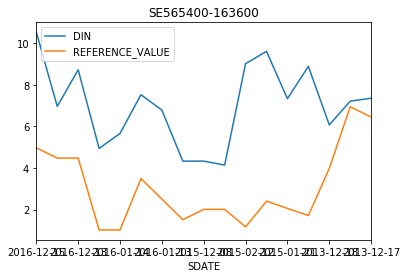

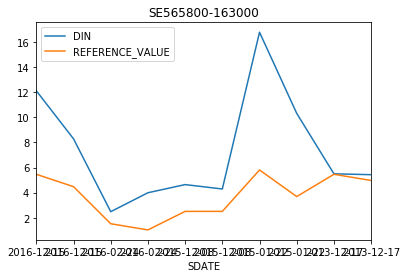

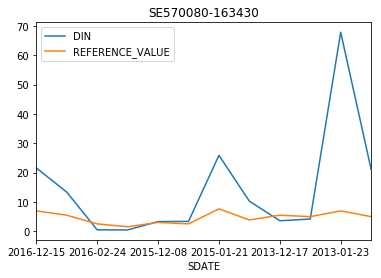

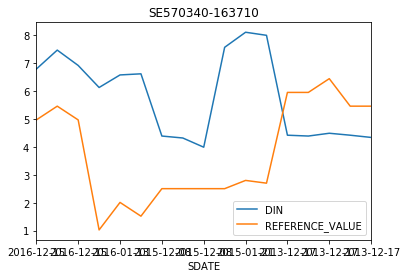

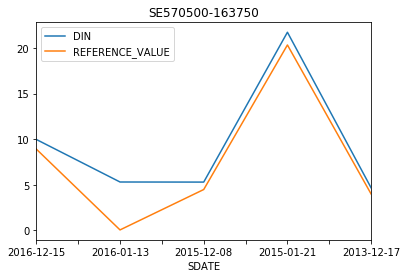

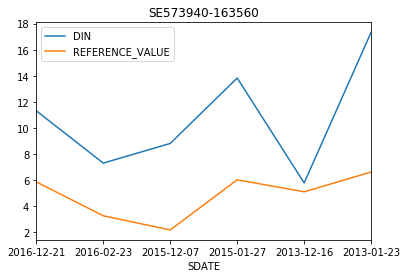

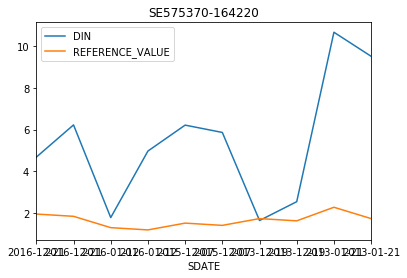

In [94]:
%matplotlib inline
for name, group in concat_df.groupby('VISS_EU_CD'):
     group.plot('SDATE', ['DIN', 'REFERENCE_VALUE'], title = name)

In [52]:
emptydf = pd.DataFrame(columns = ['DATE','WATER_TYPE_AREA' ])
emptydf.index.name = 'VISS_EU_CD'
emptydf
emptydf.index['test']

C:\Anaconda3\lib\site-packages\pandas\indexes\base.py:1423: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [80]:
ind_obj.get_water_body_indicator_df(wb)

,SDATE,YEAR,MONTH,POSITION,VISS_EU_CD,WATER_TYPE_AREA,DEPH,DIN,SALT,REFERENCE_VALUE
7031,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,5.00,6.1,2.39187
7032,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,4.85,6.0,2.50020
7033,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,4.92,6.0,2.50020
10166,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,10.10,5.3,3.25851
10167,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,9.87,5.9,2.60853
10168,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,6.95,6.5,1.95855
10930,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,8.38,5.5,3.04185
10931,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,8.13,NaN,NaN
10932,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,7.14,6.6,1.85022
17901,2015-02-09,2015,2,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,13.30,5.6,2.93352


In [82]:
temp = ind_obj.water_body_indicator_df[wb].dropna(subset = ['DIN', 'REFERENCE_VALUE']).copy(deep = True)
temp['ek'] = np.divide(temp.REFERENCE_VALUE,temp.DIN)
temp

,SDATE,YEAR,MONTH,POSITION,VISS_EU_CD,WATER_TYPE_AREA,DEPH,DIN,SALT,REFERENCE_VALUE,ek
7031,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,5.00,6.1,2.39187,0.478374
7032,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,4.85,6.0,2.50020,0.515505
7033,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,4.92,6.0,2.50020,0.508171
10166,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,10.10,5.3,3.25851,0.322625
10167,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,9.87,5.9,2.60853,0.264289
10168,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,6.95,6.5,1.95855,0.281806
10930,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,8.38,5.5,3.04185,0.362989
10932,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,7.14,6.6,1.85022,0.259134
17901,2015-02-09,2015,2,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,13.30,5.6,2.93352,0.220565
17903,2015-02-09,2015,2,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,7.93,6.6,1.85022,0.233319


In [157]:
#dw_obj.ref_settings.get_value(variable = 'HG_EQR_LIMIT', type_area = type_area)
#dw_obj.ref_settings.get_value(variable = 'PB_EQR_LIMIT', type_area = type_area)

In [36]:
#dw_obj.tolerance_settings.get_value(variable = 'MIN_NR_YEARS', type_area = '22')
#dw_obj.tolerance_settings.get_min_nr_years(type_area = '22')
#dw_obj.mapping_objects['water_body'].keys()

In [41]:
#ind_obj = w.get_step_object(step = 3, subset = subset_uuid).indicator_objects[indicator]

In [86]:
ind_obj.water_body_indicator_df[wb]

,SDATE,YEAR,MONTH,POSITION,VISS_EU_CD,WATER_TYPE_AREA,DEPH,DIN,SALT,REFERENCE_VALUE,local_EQR
7031,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,5.00,6.1,2.39187,0.478374
7032,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,4.85,6.0,2.50020,0.515505
7033,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,4.92,6.0,2.50020,0.508171
10166,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,10.10,5.3,3.25851,0.322625
10167,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,9.87,5.9,2.60853,0.264289
10168,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,6.95,6.5,1.95855,0.281806
10930,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,8.38,5.5,3.04185,0.362989
10931,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,8.13,NaN,NaN,NaN
10932,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,7.14,6.6,1.85022,0.259134
17901,2015-02-09,2015,2,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,13.30,5.6,2.93352,0.220565


In [57]:
ind_obj.classification_results[wb]['local_EQR_by_year']#.dropna(subset = ['mean_ek_value'])

KeyError: 'local_EQR_by_year'

In [46]:
ind_obj.water_body_indicator_df[wb].dropna(subset = ['REFERENCE_VALUE'])

,SDATE,YEAR,MONTH,POSITION,VISS_EU_CD,WATER_TYPE_AREA,DEPH,DIN,SALT,REFERENCE_VALUE,local_EQR
7031,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,5.00,6.1,2.39187,0.478374
7032,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,4.85,6.0,2.50020,0.515505
7033,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,4.92,6.0,2.50020,0.508171
10166,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,10.10,5.3,3.25851,0.322625
10167,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,9.87,5.9,2.60853,0.264289
10168,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,6.95,6.5,1.95855,0.281806
10930,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,8.38,5.5,3.04185,0.362989
10932,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,7.14,6.6,1.85022,0.259134
17901,2015-02-09,2015,2,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,13.30,5.6,2.93352,0.220565
17903,2015-02-09,2015,2,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,7.93,6.6,1.85022,0.233319


In [30]:
def get_EK(x):
    y = x.DIN/x.REFERENCE_VALUE
    if y > 1:
        return 1
    else:
        return y

df = ind_obj.water_body_indicator_df[wb]
df['ek_value'] = df.apply(get_EK, axis = 1)

In [31]:
df[ind_obj.indicator_parameter]/df.REFERENCE_VALUE

7057     1.002526
7058     1.011999
7059     1.075150
7349     1.193559
7350     0.852542
7351     0.895169
10343    1.795074
10344    1.262979
10345    1.235931
11065    0.914580
11066    0.937210
11067    0.911079
17831    1.114502
17832    1.042739
17833    1.155796
18397         NaN
18398         NaN
18399         NaN
18916    0.851515
18917    0.845883
18918    0.874886
26382    1.205698
26383    1.058389
26384    1.466357
27000    0.954291
27001    0.969711
27002    0.985130
34344    0.907042
34345    1.289190
34346    1.481507
dtype: float64

In [32]:
by_date = df.groupby(['SDATE', 'YEAR'],).ek_value.agg(['count', 'min', 'max', 'mean']).reset_index()
# by_date.to_csv(self.paths['results'] +'/' + self.name + water_body +'by_occation.txt', sep='\t')
by_date.rename(columns={'mean':'mean_ek_value', 'count': 'number_of_values'}, inplace=True) # Cant use "mean" below
by_date

,SDATE,YEAR,number_of_values,min,max,mean_ek_value
0,2013-01-15,2013,3,0.907042,1.000000,0.969014
1,2013-12-04,2013,3,0.954291,0.985130,0.969711
2,2014-01-16,2014,3,1.000000,1.000000,1.000000
3,2014-12-03,2014,3,0.845883,0.874886,0.857428
4,2015-01-14,2015,0,NaN,NaN,NaN
5,2015-02-11,2015,3,1.000000,1.000000,1.000000
6,2015-12-02,2015,3,0.911079,0.937210,0.920956
7,2016-01-27,2016,3,1.000000,1.000000,1.000000
8,2016-11-09,2016,3,0.852542,1.000000,0.915904
9,2016-12-07,2016,3,1.000000,1.000000,1.000000


In [34]:
# Remove occations with not enough samples
# Or use count as a flag for what to display for the user?
by_date['all_ok'] = True
ix = by_date.loc[by_date['number_of_values'] < 1, 'all_ok'].index
by_date.set_value(ix, 'all_ok', False)

,SDATE,YEAR,number_of_values,min,max,mean_ek_value,all_ok
0,2013-01-15,2013,3,0.907042,1.000000,0.969014,True
1,2013-12-04,2013,3,0.954291,0.985130,0.969711,True
2,2014-01-16,2014,3,1.000000,1.000000,1.000000,True
3,2014-12-03,2014,3,0.845883,0.874886,0.857428,True
4,2015-01-14,2015,0,NaN,NaN,NaN,False
5,2015-02-11,2015,3,1.000000,1.000000,1.000000,True
6,2015-12-02,2015,3,0.911079,0.937210,0.920956,True
7,2016-01-27,2016,3,1.000000,1.000000,1.000000,True
8,2016-11-09,2016,3,0.852542,1.000000,0.915904,True
9,2016-12-07,2016,3,1.000000,1.000000,1.000000,True


In [35]:
"""
2) Medelvärdet av EK för varje parameter beräknas för varje år.
"""
by_year = by_date.groupby('YEAR').mean_ek_value.agg(['count', 'min', 'max', 'mean']).reset_index()
by_year.rename(columns={'mean':'mean_ek_value', 'count': 'number_of_dates'}, inplace=True)
by_year['all_ok'] = True
by_year.loc[by_year['number_of_dates'] < 1, 'all_ok'] = False
# by_year.to_csv(self.paths['results'] +'/' + self.name + water_body + 'by_year.txt', sep='\t')
by_year

,YEAR,number_of_dates,min,max,mean_ek_value,all_ok
0,2013,2,0.969014,0.969711,0.969362,True
1,2014,2,0.857428,1.000000,0.928714,True
2,2015,2,0.920956,1.000000,0.960478,True
3,2016,3,0.915904,1.000000,0.971968,True


In [36]:
by_period = by_year[['mean_ek_value']].describe()
by_period

,mean_ek_value
count,4.000000
mean,0.957631
std,0.019895
min,0.928714
25%,0.952537
50%,0.964920
75%,0.970014
max,0.971968


In [37]:
"""
3) Medelvärdet av EK för varje parameter och vattenförekomst (beräknas för minst
en treårsperiod)
"""
by_period = by_year[['mean_ek_value']].describe()#.agg(['count', 'min', 'max', 'mean'])
by_period = by_period.transpose()
#by_period#.loc['mean', 'mean_ek_value']
#
#by_period['count'].get_value('mean_ek_value')
by_period['all_ok']  = True
if by_period['count'].get_value('mean_ek_value') < 3:
    by_period['all_ok'] = False

by_period

,count,mean,std,min,25%,50%,75%,max,all_ok
mean_ek_value,4.0,0.957631,0.019895,0.928714,0.952537,0.96492,0.970014,0.971968,True


In [40]:
by_period['mean'].get_value('mean_ek_value')

0.95763063655011882

In [29]:
temp_df = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'],
...                   index=pd.date_range('1/1/2000', periods=10))
temp_df.iloc[3:7] = np.nan
temp_df.describe()

,A,B,C
count,6.000000,6.000000,6.000000
mean,0.206290,0.471121,-0.242431
std,0.586035,0.679945,1.721820
min,-0.333494,-0.641210,-2.997678
25%,-0.286442,0.214068,-1.103137
50%,0.056126,0.508677,0.315088
75%,0.657880,0.929940,0.644624
max,1.001151,1.264358,1.734323


In [30]:
def set_above_one_value(x):
    if x > 1:
        return 1
    else:
        return x
dw_obj.water_body_indicator_df[wb]['EK'] = dw_obj.water_body_indicator_df[wb]['DIN']/dw_obj.water_body_indicator_df[wb]['REFERENCE_VALUE']
dw_obj.water_body_indicator_df[wb]['EK'] = dw_obj.water_body_indicator_df[wb]['EK'].apply(set_above_one_value)
dw_obj.water_body_indicator_df[wb]['EK']

7057     1.000000
7058     1.000000
7059     1.000000
7349     1.000000
7350     0.852542
7351     0.895169
10343    1.000000
10344    1.000000
10345    1.000000
11065    0.914580
11066    0.937210
11067    0.911079
17831    1.000000
17832    1.000000
17833    1.000000
18397         NaN
18398         NaN
18399         NaN
18916    0.851515
18917    0.845883
18918    0.874886
26382    1.000000
26383    1.000000
26384    1.000000
27000    0.954291
27001    0.969711
27002    0.985130
34344    0.907042
34345    1.000000
34346    1.000000
Name: EK, dtype: float64

In [31]:
dw_obj.get_filtered_data(subset = subset_uuid, step = 'step_2', type_area = 22, indicator = 'din_winter')[['DIN']].dropna()

,DIN
5199,4.68
5200,4.55
5201,4.54
5202,4.23
5203,4.42
5204,4.19
5205,5.59
5206,8.84
5207,6.77
5208,5.68


In [120]:
B2_NTOT_WINTER_SETTINGS = lv_workspace.get_subset_object('B').get_step_object('step_2').indicator_ref_settings['ntot_winter']
lv_workspace.get_subset_object('B').get_step_object('step_2').indicator_ref_settings['ntot_winter'].allowed_variables
# gör om till
# lv_workspace.get_indicator_ref_settings(step = , subset = , indicator = , waterbody/type)
# ger samma resultat som:
#lv_workspace.get_subset_object('B').get_step_object('step_2').indicator_ref_settings['ntot_winter'].settings.ref_columns

lv_workspace.get_subset_object('B').get_step_object('step_2').indicator_ref_settings['ntot_winter'].settings.get_value('EK G/M', 22)
#print(B2_NTOT_WINTER_SETTINGS)
#B2_NTOT_WINTER_SETTINGS.get_value('2', 'DEPTH_INTERVAL')

'0.85'

In [124]:
av = lv_workspace.get_subset_object('B').get_step_object('step_2').indicator_data_filter_settings['ntot_winter'].allowed_variables
lv_workspace.get_subset_object('B').get_step_object('step_2').indicator_data_filter_settings['ntot_winter'].settings.df[av]

,DEPH_INTERVAL,MONTH_LIST
0,0-10,1;2;3;12
1,0-10,1;2;3;12
2,0-10,1;2;3;12
3,0-10,1;2;3;12
4,0-10,1;2;3;12
5,0-10,1;2;3;12
6,0-10,1;2;3;12
7,0-10,1;2;12
8,0-10,1;2;12
9,0-10,1;2;12


In [119]:
lv_workspace.get_subset_object('B').get_step_object('step_2').indicator_data_filter_settings['ntot_winter'].settings.df


,TYPE_AREA_NUMBER,TYPE_AREA_SUFFIX,DEPH_INTERVAL,MIN_NR_YEARS,MIN_NR_VALUES,TIME_DELTA_TOLERANCE,POS_RADIUS_TOLERANCE,DEPH_TOLERANCE,MONTH_LIST,EKV REF,EKV H/G,EKV G/M,EKV M/O,EKV O/D,EK H/G,EK G/M,EK M/O,EK O/D,SALINITY MAX
0,1,n,0-10,3,3,3,0.1,5,1;2;3;12,-0.630*s+36,-0.715*s+40.86,-0.799*s+45.72,-1.0546*s+60.3,-1.480*s+84.6,0.88,0.79,0.6,0.43,27
1,1,s,0-10,3,3,3,0.1,5,1;2;3;12,-0.65*s+30,-0.738*s+34.05,-0.8255*s+38.1,-1.0888*s+50.25,-1.528*s+70.5,0.88,0.79,0.6,0.43,20
2,2,NaN,0-10,3,3,3,0.1,5,1;2;3;12,-0.630*s+36,-0.715*s+40.86,-0.799*s+45.72,-1.0546*s+60.3,-1.480*s+84.6,0.88,0.79,0.6,0.43,27
3,3,NaN,0-10,3,3,3,0.1,5,1;2;3;12,-0.630*s+36,-0.715*s+40.86,-0.799*s+45.72,-1.0546*s+60.3,-1.480*s+84.6,0.88,0.79,0.6,0.43,27
4,4,NaN,0-10,3,3,3,0.1,5,1;2;3;12,-0.65*s+30,-0.738*s+34.05,-0.8255*s+38.1,-1.0888*s+50.25,-1.528*s+70.5,0.88,0.79,0.6,0.43,20
5,5,NaN,0-10,3,3,3,0.1,5,1;2;3;12,0*s+17,0*s+19.295,0*s+21.59,0*s+28.475,0*s+39.95,0.89,0.77,0.61,0.43,20
6,6,NaN,0-10,3,3,3,0.1,5,1;2;3;12,0*s+17,0*s+19.295,0*s+21.59,0*s+28.475,0*s+39.95,0.89,0.77,0.61,0.43,20
7,7,NaN,0-10,3,3,3,0.1,5,1;2;12,-6*s+59,-6.6*s+64.9,-7.2*s+70.8,-9*s+88.5,-12*s+118,0.91,0.84,0.67,0.5,7
8,8,NaN,0-10,3,3,3,0.1,5,1;2;12,-6*s+59,-6.6*s+64.9,-7.2*s+70.8,-9*s+88.5,-12*s+118,0.91,0.84,0.67,0.5,7
9,9,NaN,0-10,3,3,3,0.1,5,1;2;12,-6*s+59,-6.6*s+64.9,-7.2*s+70.8,-9*s+88.5,-12*s+118,0.91,0.84,0.67,0.5,7


In [67]:
B2_NTOT_WINTER_SETTINGS.settings.mapping_water_body['N m Bottenvikens kustvatten']

{'BASIN_NUMBER': '110002.0',
 'CENTER_LAT': '64° 42\' 35,349"',
 'CENTER_LON': '21° 24\' 5,383"',
 'EU_CD': 'SE648760-213140',
 'HID': '649640-214530',
 'TYPE_AREA_NUMBER': '23',
 'TYPE_AREA_SUFFIX': '',
 'URL_VISS': 'http://www.viss.lansstyrelsen.se/waters.aspx?waterEUID=SE648760-213140'}

### Set subset time and area filter 

In [35]:
f1_A = lv_workspace.get_data_filter_object(step=1, subset='A') 
f1_A.include_list_filter

{'MYEAR': ['2016', '2017'],
 'SEA_AREA_NAME': ['Gullmarn centralbassäng', 'Rivö fjord'],
 'STATN': ['BJÖRKHOLMEN']}

In [136]:
lv_workspace.get_data_filter_info(step=1, subset='A') 

{'exclude_list': ['MYEAR', 'SEA_AREA_NAME', 'STATN'],
 'include_list': ['MYEAR', 'SEA_AREA_NAME', 'STATN']}

In [36]:
f1_A.exclude_list_filter

{'MYEAR': ['2015', '2016'], 'SEA_AREA_NAME': [], 'STATN': ['SLÄGGÖ']}

In [21]:
f0.include_list_filter

{'MYEAR': ['2016', '2017'],
 'SEA_AREA_NAME': ['Byfjorden',
  'Gullmarn centralbassäng',
  'Havstensfjorden',
  'Rivö fjord'],
 'STATN': []}

### Apply subset filter 

In [22]:
lv_workspace.apply_subset_filter(subset='A') # Not handled properly by the IndexHandler

True

### Extract filtered data 

In [23]:
data_after_subset_filter = lv_workspace.get_filtered_data(level=1, subset='A') # level=0 means first filter 
print('{} rows mathing the filter criteria'.format(len(data_after_subset_filter)))
data_after_subset_filter.head()

198 rows mathing the filter criteria


,AMON,BQIm,CPHL,DEPH,DOXY_BTL,DOXY_CTD,LATIT_DD,LONGI_DD,MNDEP,MXDEP,...,SERNO,SHARKID_MD5,SHIPC,STATN,STIME,TEMP_BTL,TEMP_CTD,WATER_DISTRICT,WATER_TYPE_AREA,WLTYP
2628,0.76,NaN,0.6,0.0,7.05,,58.38767,11.62667,NaN,NaN,...,8.0,NaN,77SN,BJÖRKHOLMEN,17:30,4.96,4.84,Västerhavets vattendistrikt,02 - Västkustens fjordar,2 - Havsområde innanför 1 NM
2629,0.72,NaN,0.5,2.0,7.12,,58.38767,11.62667,NaN,NaN,...,8.0,NaN,77SN,BJÖRKHOLMEN,17:30,4.93,4.84,Västerhavets vattendistrikt,02 - Västkustens fjordar,2 - Havsområde innanför 1 NM
2630,0.74,NaN,0.6,5.0,7.16,,58.38767,11.62667,NaN,NaN,...,8.0,NaN,77SN,BJÖRKHOLMEN,17:30,4.88,4.84,Västerhavets vattendistrikt,02 - Västkustens fjordar,2 - Havsområde innanför 1 NM
2631,0.65,NaN,0.5,10.0,7.11,,58.38767,11.62667,NaN,NaN,...,8.0,NaN,77SN,BJÖRKHOLMEN,17:30,5.12,4.86,Västerhavets vattendistrikt,02 - Västkustens fjordar,2 - Havsområde innanför 1 NM
2632,0.46,NaN,0.3,15.0,6.86,,58.38767,11.62667,NaN,NaN,...,8.0,NaN,77SN,BJÖRKHOLMEN,17:30,5.52,5.10,Västerhavets vattendistrikt,02 - Västkustens fjordar,2 - Havsområde innanför 1 NM


In [24]:
# show available waterbodies
lst = data_after_subset_filter.SEA_AREA_NAME.unique()
print('Waterbodies in subset:\n{}'.format('\n'.join(lst)))

Waterbodies in subset:
Gullmarn centralbassäng


In [24]:
import numpy as np
np.where(lv_workspace.index_handler.subset_filter)

(array([2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639,
        2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764,
        2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880,
        2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962,
        3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087,
        3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195,
        3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292,
        3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419,
        3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503,
        3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634,
        3717, 3718, 3719, 3720, 3721, 3722, 3723, 3724, 3725, 3726, 3727,
        3859, 3860, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869,
        3979, 3980, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988, 3989,
        4110, 4111, 4112, 4113, 4114, 

In [25]:
f = lv_workspace.get_data_filter_object(step=1, subset='A') 


In [26]:
f.all_filters

{'exclude_list': ['MYEAR', 'SEA_AREA_NAME', 'STATN'],
 'include_list': ['MYEAR', 'SEA_AREA_NAME', 'STATN']}

In [27]:
f.exclude_list_filter

{'MYEAR': ['2015', '2016'], 'SEA_AREA_NAME': [], 'STATN': ['SLÄGGÖ']}

In [28]:
f.include_list_filter

{'MYEAR': ['2016', '2017'],
 'SEA_AREA_NAME': ['Gullmarn centralbassäng', 'Rivö fjord'],
 'STATN': ['BJÖRKHOLMEN']}

In [29]:
s = lv_workspace.get_step_1_object('A')

In [30]:
s.data_filter.all_filters

{'exclude_list': ['MYEAR', 'SEA_AREA_NAME', 'STATN'],
 'include_list': ['MYEAR', 'SEA_AREA_NAME', 'STATN']}

In [31]:
f0 = lv_workspace.get_data_filter_object(step=0) 

In [32]:
f0.exclude_list_filter

{'MYEAR': ['2015', '2016'], 'SEA_AREA_NAME': [], 'STATN': []}

In [33]:
f0.include_list_filter

{'MYEAR': ['2016', '2017'],
 'SEA_AREA_NAME': ['Byfjorden',
  'Gullmarn centralbassäng',
  'Havstensfjorden',
  'Rivö fjord'],
 'STATN': []}

# Quality factor Nutrients

In [ ]:
lv_workspace.initiate_quality_factors()